In [104]:
#Import libraries
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import string
from wordcloud import WordCloud
import imblearn
from imblearn.over_sampling import RandomOverSampler
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


nltk.download("wordnet")
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [105]:
# Converting the csv file to a pandas dataframe
# Load dataset
df = pd.read_csv('/content/amazon_reviews.csv')

In [106]:
# Assuming 'df' is your DataFrame
good_reviews = df[df['feedback'] == 1]
bad_reviews = df[df['feedback'] == 0]

# Convert the 'verified_reviews' column to lists
good = good_reviews['verified_reviews'].tolist()
bad = bad_reviews['verified_reviews'].tolist()

# Convert each item in the lists to a string before joining
good_str = ' '.join(map(str, good))
bad_str = ' '.join(map(str, bad))

# Split the strings into words
good_words = good_str.split()
bad_words = bad_str.split()

# Printing the results for verification
print("Good Words:", good_words[:10])  # Print first 10 words as a sample
print("Bad Words:", bad_words[:10])    # Print first 10 words as a sample


Good Words: ['Love', 'my', 'Echo!', 'Loved', 'it!', 'Sometimes', 'while', 'playing', 'a', 'game,']
Bad Words: ["It's", 'like', 'Siri,', 'in', 'fact,', 'Siri', 'answers', 'more', 'accurately', 'then']


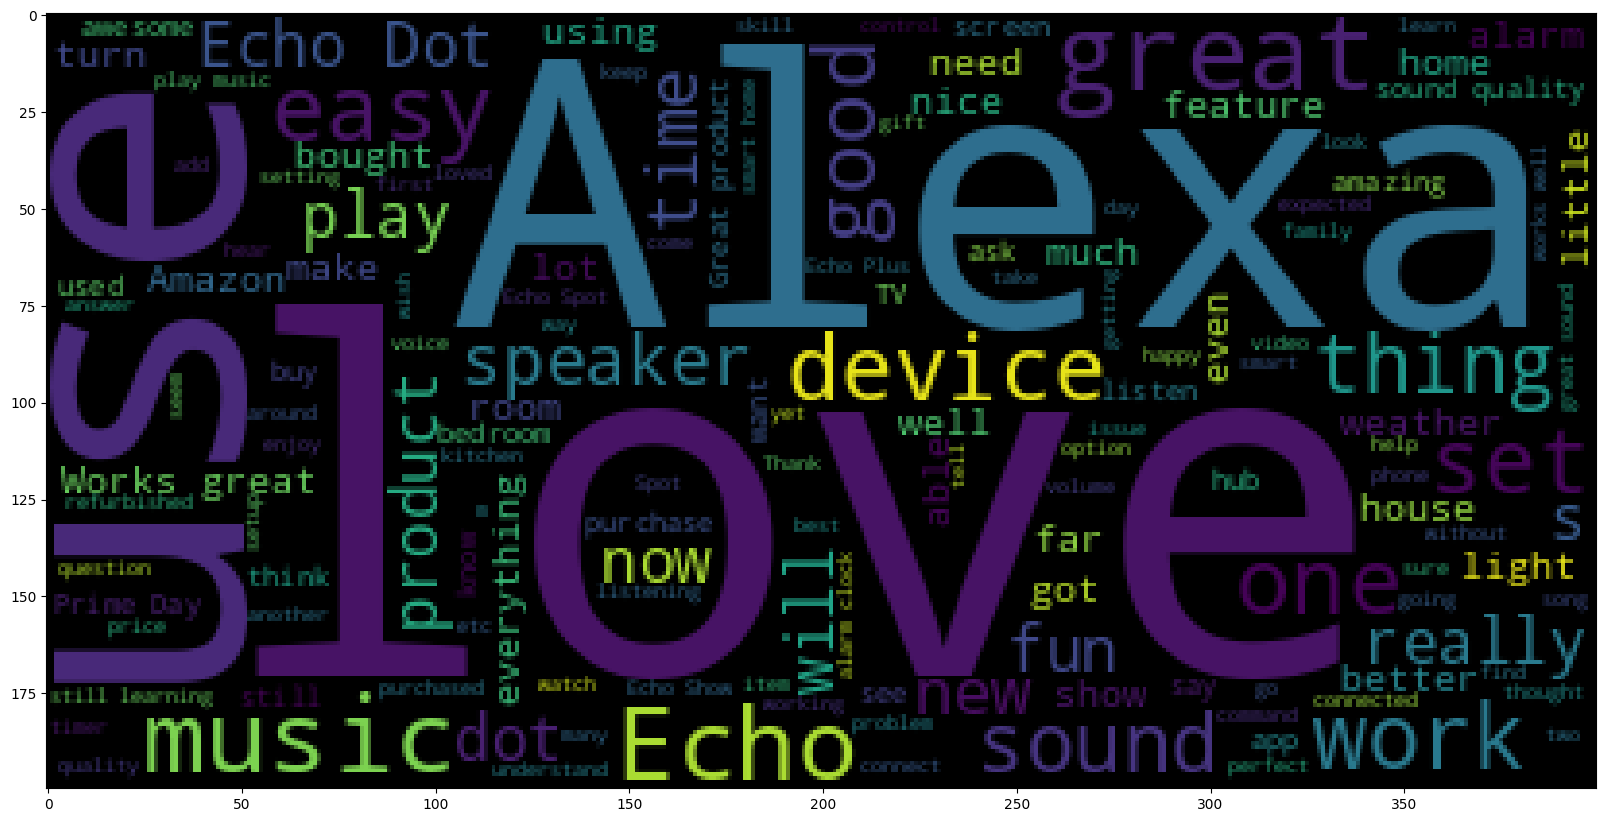

In [107]:
# Generate Word CLoud for Positive Reviews
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(good_str))

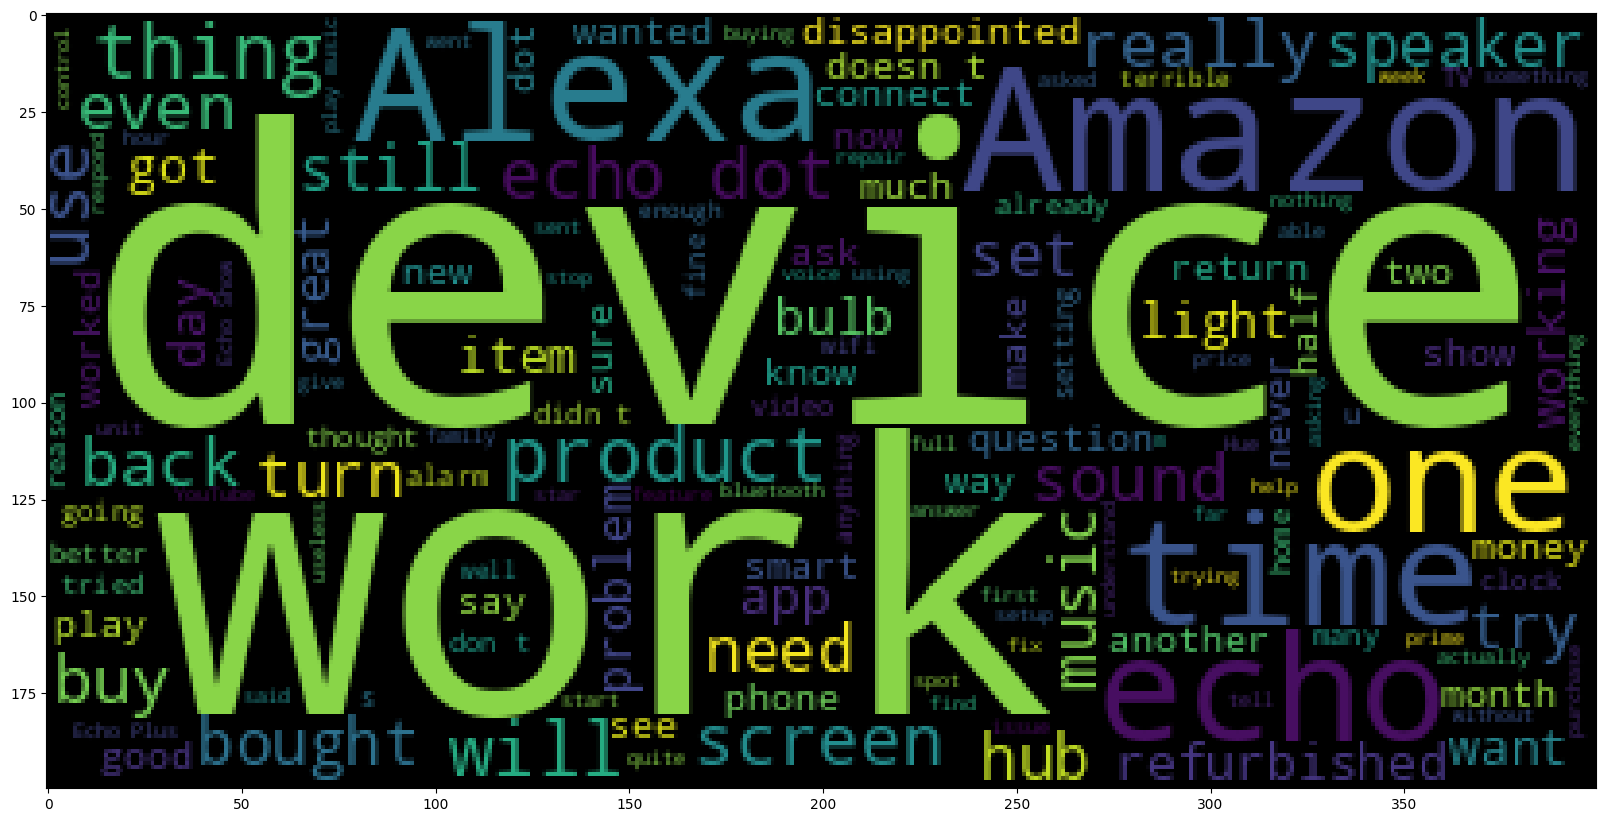

In [108]:
# Generate Word CLoud for Negative Reviews
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(bad_str))

In [109]:
# Removing the extra spaces in the variation column
df['variation'] = df['variation'].str.strip()

In [110]:
#Analyzing the number of each variation of the product
df['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

In [113]:
#Replacing the empty rows and columms with NaN and deleting them.
df['verified_reviews'].replace(' ', np.nan, inplace=True)
df.dropna(subset=['verified_reviews'], inplace=True)

<Axes: >

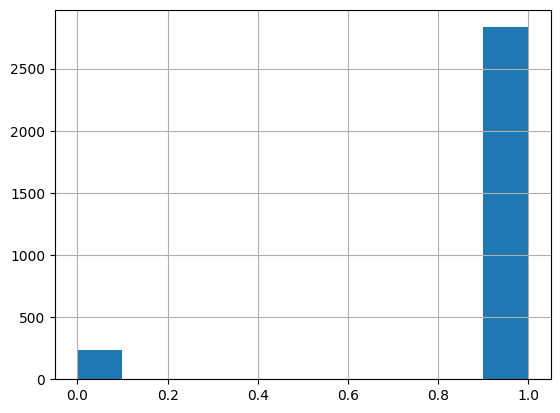

In [114]:
# Assigning the reviews (X) and the feedback as the target (Y)
X = df['verified_reviews']
y = df['feedback']

# Displaying the target column (Y) on a histogram according to the number of positive reviews and negative reviews
y.hist()

In [115]:
#Handling Imbalance Data
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X.values.reshape(-1, 1), y)

In [116]:
# Perform cleaning of the data column as pass this function to the Vectorizer
def preprocessing(message):
    Test_punc_removed = [word for word in message if word not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords and word.lower().isalpha() and word is not None]
    Test_punc_removed_join_clean = ' '.join(Test_punc_removed_join_clean)
    return Test_punc_removed_join_clean

In [117]:
# Reshape the array to a 1D.
X_res = np.ravel(X_res)
X_res.shape
#Convert the Array to a dataframe.
X_res = pd.Series(X_res)

In [118]:
# Divide the balanced target column (Y) and  reviews column (X) to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    stratify=y_res,
                                                    test_size=0.25, random_state = 245)

<Axes: >

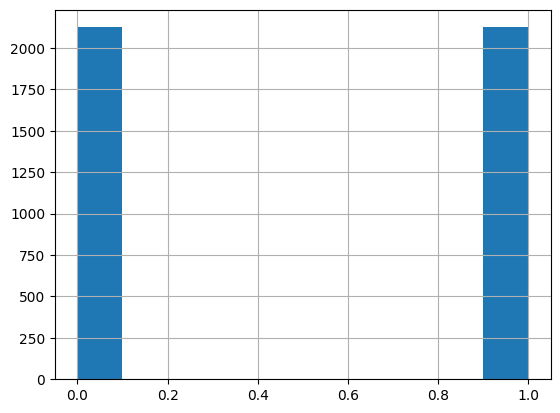

In [119]:
# Convert the y_train to a histogram.
y_train.hist()

In [120]:
# Viewing the shape of the X_train dataset.
X_train.shape

(4249,)

In [122]:
# Using Tfidf Vectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2),max_features=2000)
# tokenizer=LemmaTokenizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       708
           1       0.99      0.96      0.98       709

    accuracy                           0.98      1417
   macro avg       0.98      0.98      0.98      1417
weighted avg       0.98      0.98      0.98      1417


Accuracy Score: 0.976711362032463


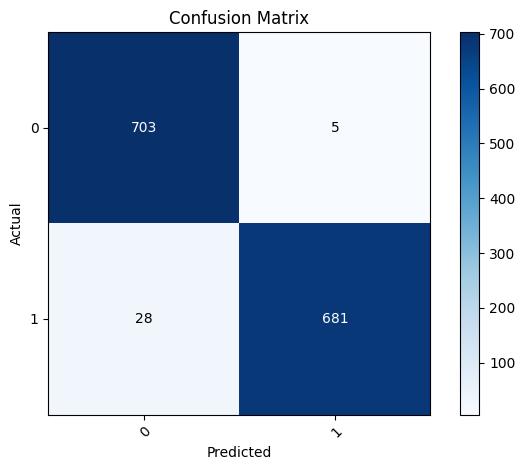

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Train the Logistic Regression model
LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)

# Function to evaluate and plot the model
def model_evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


    # Plot confusion matrix with values
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=np.unique(y_test),
           yticklabels=np.unique(y_test),
           title='Confusion Matrix',
           xlabel='Predicted',
           ylabel='Actual')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

# Evaluate and plot the Logistic Regression model
model_evaluate(LRmodel, X_test, y_test)



Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75       708
           1       0.72      0.93      0.81       709

    accuracy                           0.78      1417
   macro avg       0.81      0.78      0.78      1417
weighted avg       0.81      0.78      0.78      1417


Accuracy Score: 0.7819336626676077


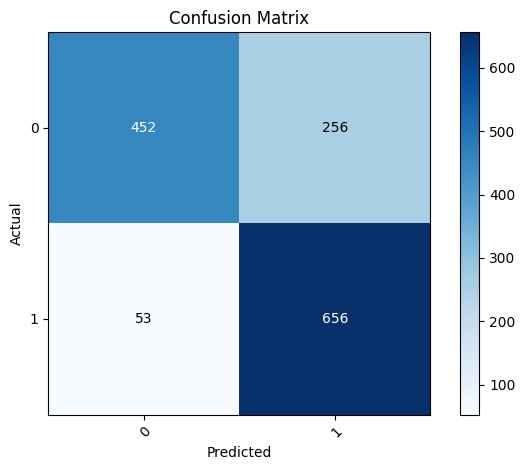

In [128]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
# Using BernoulliNB
BNBmodel = BernoulliNB(alpha = 1)
BNBmodel.fit(X_train, y_train)
# Function to evaluate the model
def model_evaluate(model):
    y_pred = model.predict(X_test)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
     # Plot confusion matrix with values
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=np.unique(y_test),
           yticklabels=np.unique(y_test),
           title='Confusion Matrix',
           xlabel='Predicted',
           ylabel='Actual')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
model_evaluate(BNBmodel)

In [94]:
!pip install catboost



Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       708
           1       0.99      0.97      0.98       709

    accuracy                           0.98      1417
   macro avg       0.98      0.98      0.98      1417
weighted avg       0.98      0.98      0.98      1417


Accuracy Score: 0.9823570924488356


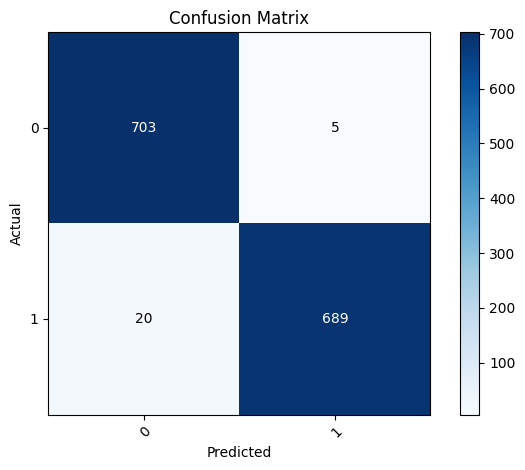

In [129]:
# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize CatBoost model
CBmodel = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0, random_state=42)

# Fit the model
CBmodel.fit(X_train, y_train)

# Function to evaluate the model
def model_evaluate(model):
    y_pred = model.predict(X_test)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
     # Plot confusion matrix with values
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=np.unique(y_test),
           yticklabels=np.unique(y_test),
           title='Confusion Matrix',
           xlabel='Predicted',
           ylabel='Actual')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

# Evaluate the CatBoost model
model_evaluate(CBmodel)

In [130]:
test = ["I am not fully into the product"]
test = pd.Series(test)
pred_test = tfidf.transform(test)
LRmodel.predict(pred_test)

array([0])


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       708
           1       0.99      0.96      0.98       709

    accuracy                           0.98      1417
   macro avg       0.98      0.98      0.98      1417
weighted avg       0.98      0.98      0.98      1417


Accuracy Score: 0.976711362032463


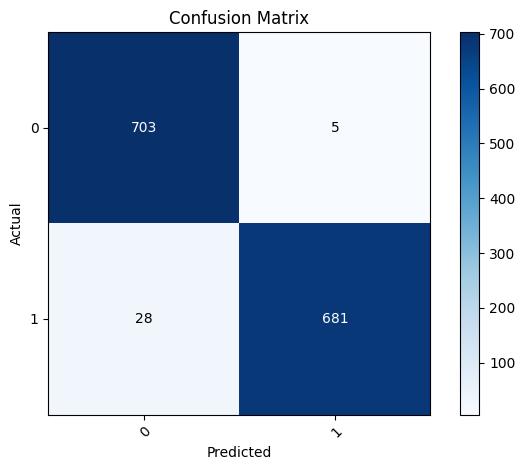

In [132]:
# Using a Pipeline in Sklearn to chain the steps of the workflow

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    stratify=y_res,
                                                    test_size=0.25, random_state = 245)

pipeLR = Pipeline([('vectorizer', tfidf),('LRmodel',LRmodel)])
pipeLR.fit(X_train, y_train)

model_evaluate(pipeLR)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       708
           1       0.99      0.97      0.98       709

    accuracy                           0.98      1417
   macro avg       0.98      0.98      0.98      1417
weighted avg       0.98      0.98      0.98      1417


Accuracy Score: 0.9823570924488356


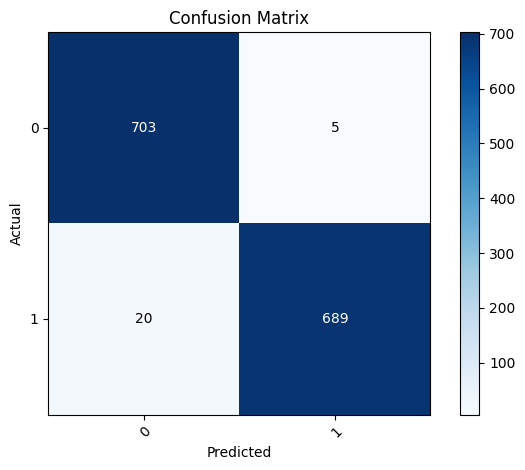

In [134]:
# Using a Pipeline in Sklearn to chain the steps of the workflow

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    stratify=y_res,
                                                    test_size=0.25, random_state = 245)

pipeCB = Pipeline([('vectorizer', tfidf),('CBmodel',CBmodel)])
pipeCB.fit(X_train, y_train)

model_evaluate(pipeCB)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75       708
           1       0.72      0.93      0.81       709

    accuracy                           0.78      1417
   macro avg       0.81      0.78      0.78      1417
weighted avg       0.81      0.78      0.78      1417


Accuracy Score: 0.7819336626676077


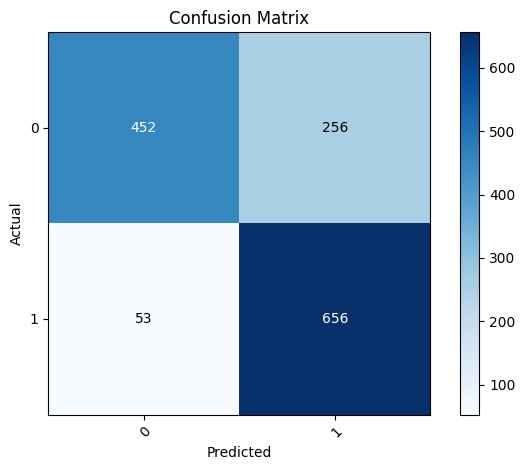

In [135]:
# Using a Pipeline in Sklearn to chain the steps of the workflow

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    stratify=y_res,
                                                    test_size=0.25, random_state = 245)

pipeBNB = Pipeline([('vectorizer', tfidf),('BNBmodel',BNBmodel)])
pipeBNB.fit(X_train, y_train)

model_evaluate(pipeBNB)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       708
           1       0.99      0.96      0.98       709

    accuracy                           0.98      1417
   macro avg       0.98      0.98      0.98      1417
weighted avg       0.98      0.98      0.98      1417


Accuracy Score: 0.976711362032463


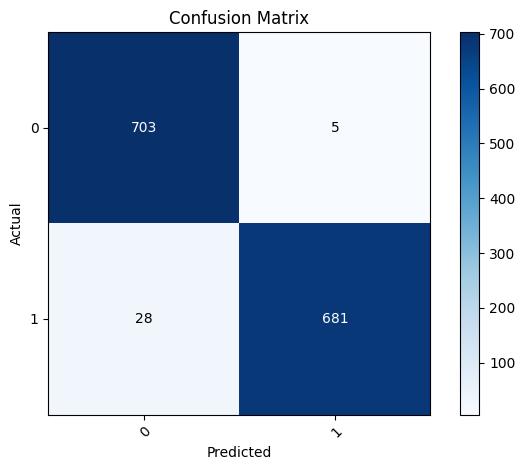

In [137]:
# Creating a pickle file to store and retrieve the object for future use
with open('pipeline.pickle','wb') as f:
    pickle.dump(pipeLR, f)

with open('pipeline.pickle', 'rb') as f:
    loaded_vector_pipe = pickle.load(f)

model_evaluate(loaded_vector_pipe)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       708
           1       0.99      0.97      0.98       709

    accuracy                           0.98      1417
   macro avg       0.98      0.98      0.98      1417
weighted avg       0.98      0.98      0.98      1417


Accuracy Score: 0.9823570924488356


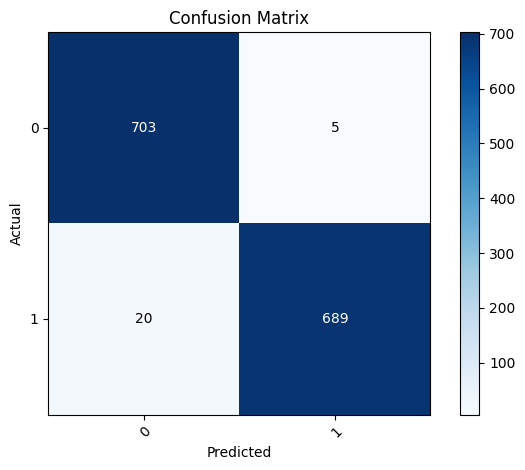

In [138]:
# Creating a pickle file to store and retrieve the object for future use
with open('pipeline.pickle','wb') as f:
    pickle.dump(pipeCB, f)

with open('pipeline.pickle', 'rb') as f:
    loaded_vector_pipe = pickle.load(f)

model_evaluate(loaded_vector_pipe)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75       708
           1       0.72      0.93      0.81       709

    accuracy                           0.78      1417
   macro avg       0.81      0.78      0.78      1417
weighted avg       0.81      0.78      0.78      1417


Accuracy Score: 0.7819336626676077


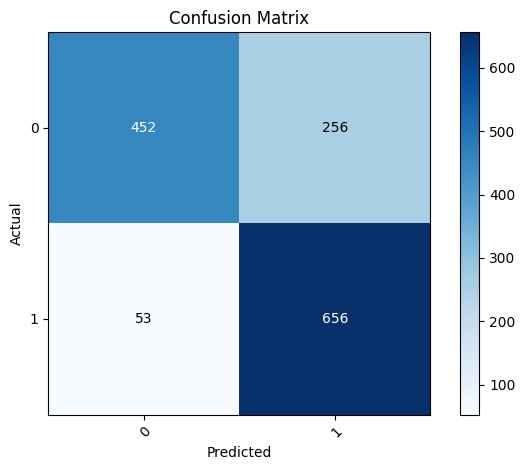

In [139]:
# Creating a pickle file to store and retrieve the object for future use
with open('pipeline.pickle','wb') as f:
    pickle.dump(pipeBNB, f)

with open('pipeline.pickle', 'rb') as f:
    loaded_vector_pipe = pickle.load(f)

model_evaluate(loaded_vector_pipe)

In [140]:
# A function that performs prediction according to the user input text
def predict(model, user_text):
    # Predict the sentiment
    predictions = model.predict(user_text)
    pred_to_label = {0: 'Negative', 1: 'Positive'}

    # Make a list of user_text with sentiment.
    data = []
    for t, pred in zip(text, predictions):
        data.append((t, pred, pred_to_label[pred]))

    return data


if __name__=="__main__":
    # Text to classify should be in a list.
    text = ["I bought this product thinking it would solve all my problems, but I was sorely disappointed. The quality was poor, and it didn't work as advertised. It broke after a few uses, and the customer service was terrible. I wouldn't recommend this product to anyone",
        "I love this project",
        "I am going to return this product"]

    predictions = predict(loaded_vector_pipe, text)
    print(predictions)

[("I bought this product thinking it would solve all my problems, but I was sorely disappointed. The quality was poor, and it didn't work as advertised. It broke after a few uses, and the customer service was terrible. I wouldn't recommend this product to anyone", 0, 'Negative'), ('I love this project', 1, 'Positive'), ('I am going to return this product', 1, 'Positive')]
